# 色変換系
1. CLAHE
1. InvertImg
1. RandomGamma
1. ChannelShuffle
1. HueSaturationValue
1. RGBShift
1. RandomBrightnessContrast
1. RandomBrightness
1. RandomContrast
1. ToGray

In [1]:
from albumentations import (
    CLAHE,
    InvertImg,
    RandomGamma,
    ChannelShuffle,
    HueSaturationValue,
    RGBShift,
    RandomBrightnessContrast,
    RandomBrightness,
    RandomContrast,
    ToGray
    )
from utils import *

In [2]:
data = get_data()
image = data['image']
image_seg = data['seg_img']
mask = data['mask']
image_det = data['det_img']
bboxes = data['bboxes']

## CLAHE

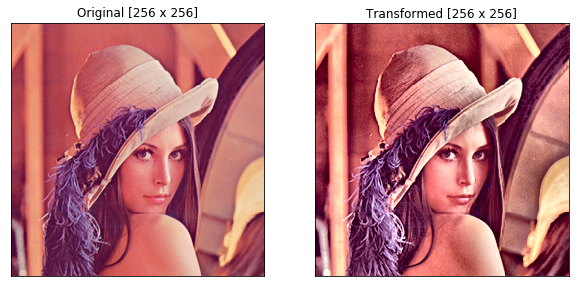

In [3]:
"""Apply Contrast Limited Adaptive Histogram Equalization to the input image.

Args:
    clip_limit (float): upper threshold value for contrast limiting. Default: 4.0.
        tile_grid_size ((int, int)): size of grid for histogram equalization. Default: (8, 8).
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8
    
Comment:
    clip_limit: コントラストの上限閾値
    tile_grid_size: ヒストグラム均等化のグリッドサイズ
    肩の位置に注目
"""

trans = CLAHE(clip_limit=8.0, tile_grid_size=(4, 4), always_apply=False, p=1)
imshow2(image, transforms=trans)

## ChannelShuffle

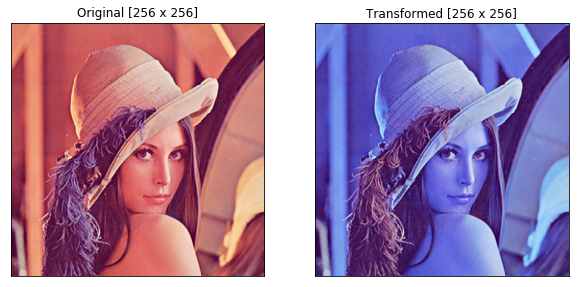

In [4]:
"""Randomly rearrange channels of the input RGB image.

Args:
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8, float32
    
Comment: 
    Channelをランダムにシャッフル（RGB, GBR, BGR, RBG...)
"""

trans = ChannelShuffle(always_apply=False, p=1)
imshow2(image, transforms=trans)

## InvertImg

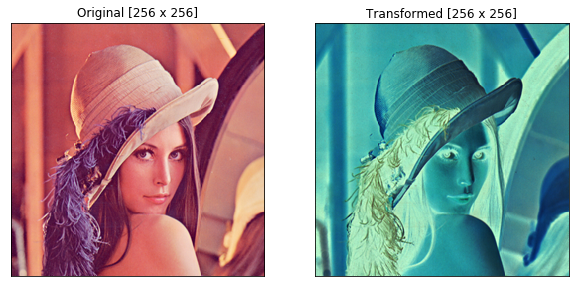

In [5]:
"""Invert the input image by subtracting pixel values from 255.

Args:
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8

Comment:
    色反転。
"""

trans = InvertImg(always_apply=False, p=1)
imshow2(image, transforms=trans)

## RandomGamma

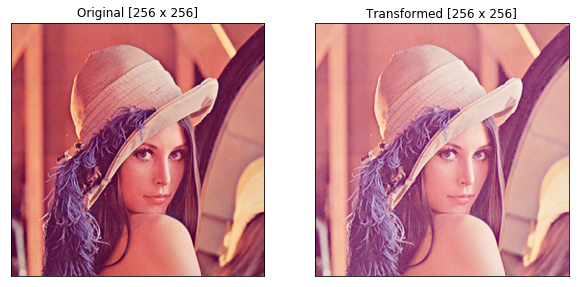

In [6]:
"""
Args(非公式):
    gamma_limit (int, int): inverse of gamma range.
    p (float): probability of applying the transform. Default: 1.
    
Targets:
    image

Image types:
    uint8, float32
    
Comment:
    gammma_limitの範囲内からランダムで一つの整数を選び、その逆数(invGamma = 1/gamma)でガンマ変換を行う。
    実際には、uint8で画像が渡された場合は、
    
        np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        
    でテーブルが作成されて、LUT(Look Up Table)で変換されています。
    
    float32で画像が渡された場合はinvGammaで画像全体を累乗しています。
"""

trans = RandomGamma(gamma_limit=(150,180), always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## HueSaturationValue

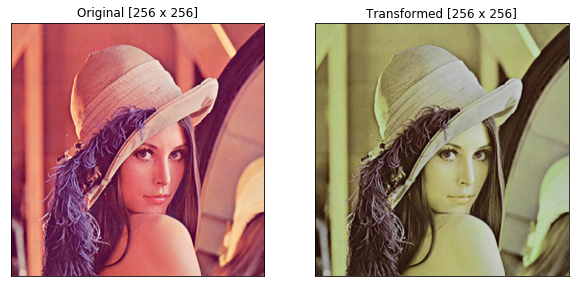

In [7]:
"""Randomly change hue, saturation and value of the input image.

Args:
    hue_shift_limit ((int, int) or int): range for changing hue. If hue_shift_limit is a single int, the range
        will be (-hue_shift_limit, hue_shift_limit). Default: 20.
    sat_shift_limit ((int, int) or int): range for changing saturation. If sat_shift_limit is a single int,
        the range will be (-sat_shift_limit, sat_shift_limit). Default: 30.
    val_shift_limit ((int, int) or int): range for changing value. If val_shift_limit is a single int, the range
        will be (-val_shift_limit, val_shift_limit). Default: 20.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    色相(Hue)・彩度(Saturation)・明度(Value)に対して、
    それぞれhue_shift_limit,sat_shift_limit,val_shift_limitの範囲から選んだ数値を足し合わせる。
    詳しくは、HSV色空間で検索してみてください。
"""

trans = HueSaturationValue(hue_shift_limit=30, sat_shift_limit=50, val_shift_limit=50, always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RGBShift

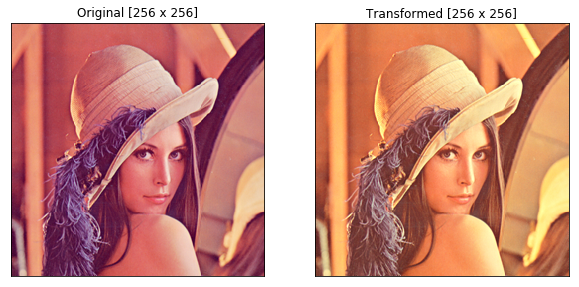

In [8]:
"""Randomly shift values for each channel of the input RGB image.

Args:
    r_shift_limit ((int, int) or int): range for changing values for the red channel. If r_shift_limit is a single
        int, the range will be (-r_shift_limit, r_shift_limit). Default: 20.
    g_shift_limit ((int, int) or int): range for changing values for the green channel. If g_shift_limit is a
        single int, the range  will be (-g_shift_limit, g_shift_limit). Default: 20.
    b_shift_limit ((int, int) or int): range for changing values for the blue channel. If b_shift_limit is a single
        int, the range will be (-b_shift_limit, b_shift_limit). Default: 20.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    r_shift_limit, g_shift_limit, b_shift_limitの範囲からランダムに選ばれた値分だけ、それぞれRed,Green,Blueチャンネルに加えられます。
"""

trans = RGBShift(r_shift_limit=40, g_shift_limit=40, b_shift_limit=40, always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RandomBrightnessContrast

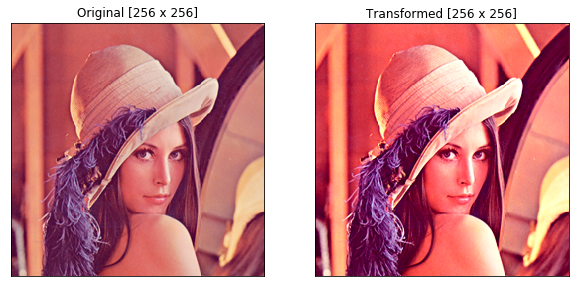

In [9]:
"""Randomly change brightness and contrast of the input image.

Args:
    brightness_limit ((float, float) or float): factor range for changing brightness.
        If limit is a single float, the range will be (-limit, limit). Default: 0.2.
    contrast_limit ((float, float) or float): factor range for changing contrast.
        If limit is a single float, the range will be (-limit, limit). Default: 0.2.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    明るさとコントラストをランダムで変換します。
    明るさの変換は、brightness_limitの範囲から選ばれた値に1.0を加えた分だけ、画像全体に乗算します。
        img *= 1.0 + 選ばれた値
    コントラストの変換は、contrast_limitの範囲から選ばれた値と画像全体の平均値を乗算した値が画像全体に加算されます。
        img += 選ばれた値 * np.mean(img)
"""
trans = RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RandomBrightness

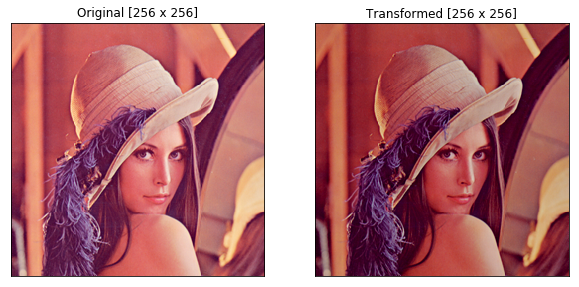

In [10]:
"""Randomly change brightness of the input image.

Args:
    limit ((float, float) or float): factor range for changing brightness.
        If limit is a single float, the range will be (-limit, limit). Default: 0.2.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    内部で
        RandomBrightnessContrast(brightness_limit=limit, contrast_limit=0,always_apply=always_apply, p=p)
    に変換されています。
"""
trans = RandomBrightness(limit=0.6, always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RandomContrast

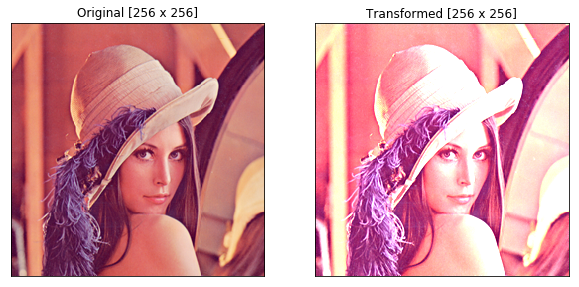

In [11]:
"""Randomly change contrast of the input image.

Args:
    limit ((float, float) or float): factor range for changing contrast.
        If limit is a single float, the range will be (-limit, limit). Default: 0.2.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    内部で
        RandomBrightnessContrast(brightness_limit=0, contrast_limit=limit,always_apply=always_apply, p=p)
    に変換されています。
"""
trans = RandomContrast(limit=(0.7, 0.9), always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## ToGray

image shape: (256, 256, 3)


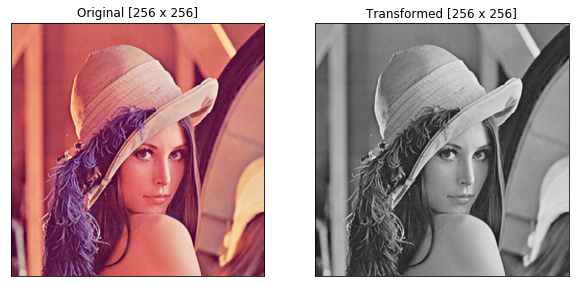

In [12]:
"""Convert the input RGB image to grayscale. If the mean pixel value for the resulting image is greater
than 127, invert the resulting grayscale image.

Args:
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8, float32
Comment:
    グレースケールに変換をするが、次元は3のまま。
"""
trans = ToGray(always_apply=False, p=1.0)
imshow2(image, transforms=trans)
print('image shape: {}'.format(trans(image=image)['image'].shape))